<a href="https://colab.research.google.com/github/e-albuquerque/Mecmat-1/blob/main/Criterios_de_falha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Critérios de Falha

## Critério de Tresca

$ FS_{Tresca} = $ Fator de segurança segundo o critério de Tresca

$\sigma_e =$  Limite de escoamento

$\tau_e =$ Maior tensão principal para o estado de tensão do corpo de prova no momento da falha

$\tau_{max} =$  Tensão máxima de cisalhamento

$\sigma_1 =$ Maior tensão principal

$\sigma_3 =$ Menor tensão principal


$$ FS_{Tresca} = \frac{\tau_e}{\tau_{max}}$$
$$\tau_e=\frac{\sigma_e}{2}$$
$$\tau_{max}=\frac{\sigma_1-\sigma_3}{2}$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def calc_taumax(sigx,sigy,tauxy):
  # Calcula a máxima tensão de cisalhamento para um
  #     dado estado de tensão
  sigmed=(sigx+sigy)/2
  r=np.sqrt(((sigx-sigy)/2)**2+tauxy**2)
  siga=sigmed+r
  sigb=sigmed-r
  taumax=np.max(np.array([siga/2,np.abs(sigb)/2,((siga-sigb)/2)]))
  return taumax

In [ ]:
sigx=80
sigy=-40
tauxy=25
sig_e=250
taumax=calc_taumax(sigx,sigy,tauxy)
taue=sig_e/2
sigmed=(sigx+sigy)/2
r=np.sqrt(((sigx-sigy)/2)**2+tauxy**2)
siga=sigmed+r
sigb=sigmed-r

FSTresca=taue/taumax
print("Fator de segurança segundo o critério de Tresca = ", FSTresca)

Fator de segurança segundo o critério de Tresca =  1.9230769230769231


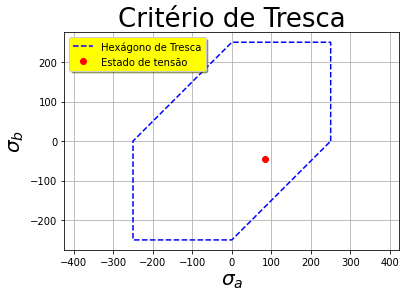

In [ ]:
# Tresca
# Pontos que definem o Hexágono de Tresca
tresca=np.array([[sig_e,0],[sig_e,sig_e],[0,sig_e],
                 [-sig_e,0],[-sig_e,-sig_e],[0,-sig_e],[sig_e,0]])
plt.plot(tresca[:,0],tresca[:,1],'b--',label='Hexágono de Tresca');
plt.plot(siga,sigb,'ro',label='Estado de tensão');
plt.axis("tight") # Fit the axis tightly to the plot
plt.title("Critério de Tresca",fontsize=26)
plt.xlabel(r"$\sigma_{a}$",fontsize=20)
plt.ylabel(r"$\sigma_{b}$",fontsize=20)
legend = plt.legend(loc='upper left', shadow=True, fontsize=10)
# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('yellow')

plt.axis("equal")
plt.grid("on")
plt.show()

## Critério de von Mises

$ FS_{von Mises} = $ Fator de segurança segundo o critério de von Mises

$\sigma' =$  Tensão equivalente de von Mises

$\sigma_e =$ Limite de escoamento


$$\sigma'=\sqrt{\sigma_a^2+\sigma_b^2-\sigma_a \sigma_b}$$

$$ FS_{von Mises} = \frac{\sigma_e}{\sigma'}$$



In [ ]:
def calc_tensao_von_Mises(sigx,sigy,tauxy):
  # Calcula a tensão equivalente de von Mises
  sigmed=(sigx+sigy)/2
  r=np.sqrt(((sigx-sigy)/2)**2+tauxy**2)
  siga=sigmed+r
  sigb=sigmed-r
  sigmalinha=np.sqrt(siga**2+sigb**2-siga*sigb)
  return sigmalinha

In [ ]:
siglinha=calc_tensao_von_Mises(sigx,sigy,tauxy)
FSvonMises=sig_e/siglinha
print("Tensão equivalente de von Mises = ", siglinha)
print("Fator de segurança segundo o critério de von Mises = ", FSvonMises)

Tensão equivalente de von Mises =  114.34596626029271
Fator de segurança segundo o critério de von Mises =  2.1863473472331303


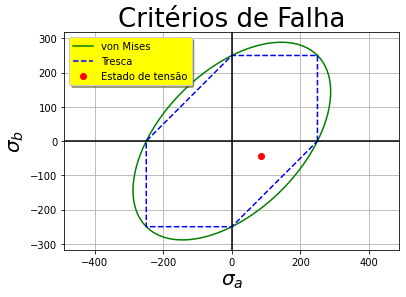

In [ ]:
# von Mises
# Semi-eixo maior da elipse de von Mises
a = sig_e*np.sqrt(2)

# Semi-eixo menor da elipse de von Mises
b=sig_e*np.sqrt(2)/np.sqrt(3)

# Número de pontos usados para plotar a elipse de von Mises
npoints=100
# Vetor theta para a equação paramétrica da elipse
theta=np.linspace(0,2*np.pi,npoints)

# Ângulo de inclinação da elipse de von Mises
gamma = np.pi/4

# Equação paramètrica da elipse inclinada
sig_a=a*np.cos(theta)*np.cos(gamma)-b*np.sin(theta)*np.sin(gamma)
sig_b=a*np.cos(theta)*np.sin(gamma) + b*np.sin(theta)*np.cos(gamma)

# Gráficos
fig, ax = plt.subplots()
ax.plot(sig_a,sig_b,'g-',label='von Mises')
ax.plot(tresca[:,0],tresca[:,1],'b--',label='Tresca')
ax.plot(siga,sigb,'ro',label='Estado de tensão');

ax.set_aspect('equal')
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.title("Critérios de Falha",fontsize=26)
plt.xlabel(r"$\sigma_{a}$",fontsize=20)
plt.ylabel(r"$\sigma_{b}$",fontsize=20)
legend = plt.legend(loc='upper left', shadow=True, fontsize=10)
# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('yellow')
plt.axis("equal")
plt.show()


# Maior diferença entre os critérios
$$\sigma_a=-\sigma_b$$

* Tresca
$$\sigma_a=\sigma_b-\sigma_e$$
$$\sigma_a=-\sigma_b=\frac{\sigma_e}{2}$$


* von Mises
$$\sigma_a^2+(-\sigma_a)^2-2*\sigma_a(-\sigma_a)=\sigma_e^2$$
$$\sigma_a=-\sigma_b=\frac{\sigma_e}{\sqrt(3)}$$
$$\sigma'=\sqrt{\frac{\sigma_e^2}{4}+\frac{\sigma_e^2}{4}+\frac{\sigma_e^2}{4}}$$
$$\sigma'=\frac{\sqrt{3}\sigma_e}{2}$$
$$FS_{von Mises}=\frac{\sigma_e}{\frac{\sqrt{3}\sigma_e}{2}}=\frac{2}{\sqrt{3}}=1,16$$

In [ ]:
2/np.sqrt(3)

1.1547005383792517